In [69]:
from utils import load_series_dfs
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import os
from shapely import wkt, Point
import geopandas as gpd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import pickle
import requests

ImportError: cannot import name 'shape' from 'shapely' (C:\Users\johan\miniconda3\envs\ersatzwerte_project\lib\site-packages\shapely\__init__.py)

In [2]:
series_dfs = load_series_dfs(data_dir='C:/Users/johan/Documents/FH_Master/data')

In [6]:
series_dfs.keys()

dict_keys(['FL_00024702.PLAN.MengeHH', 'FL_00024730.PLAN.MengeHH', 'FL_00352243.PLAN.MengeHH', 'FL_00352244.PLAN.MengeGA', 'FL_00352244.PLAN.MengeKW', 'FL_00024360.PLAN.MengeGA', 'FL_00352254.PLAN.MengeGA', 'FL_00025248.PLAN.MengeGA', 'FL_00024360.PLAN.MengeHH.2', 'FL_00024731.PLAN.MengeHH', 'FL_00024735.PLAN.MengeHH', 'FL_00024667.PLAN.MengeHH', 'FL_00352218.PLAN.MengeHH', 'FL_00025240.PLAN.MengeHH', 'FL_00025241.PLAN.MengeHH', 'FL_00020896.PLAN.MengeHH', 'FL_00342704.PLAN.MengeGA', 'FL_00352054.PLAN.MengeHH', 'CV_00348266.PLAN.Menge', 'FL_00352254.PLAN.MengeHH', 'FL_00352244.PLAN.MengeHH', 'FL_00342704.PLAN.MengeHH', 'CV_00003083.PLAN.Menge', 'CV_00003181.PLAN.Menge', 'CV_00003192.PLAN.Menge', 'CV_00003191.PLAN.Menge', 'CV_00003183.PLAN.Menge', 'CV_00001876.PLAN.Menge', 'CV_00003094.PLAN.Menge', 'CV_00003089.PLAN.Menge', 'CV_00007270.PLAN.Menge', 'CV_00007300.PLAN.Menge', 'KN_00001613.PLAN.Menge', 'KN_00000069.PLAN.Menge', 'KN_00000067.PLAN.Menge', 'CV_00007809.PLAN.Menge', 'FL_00352

In [7]:
# Alle Serien-Keys sammeln
keys = list(series_dfs.keys())

# Primary Key jeweils vor dem ersten Punkt
primary_keys = [key.split('.', 1)[0] for key in keys]

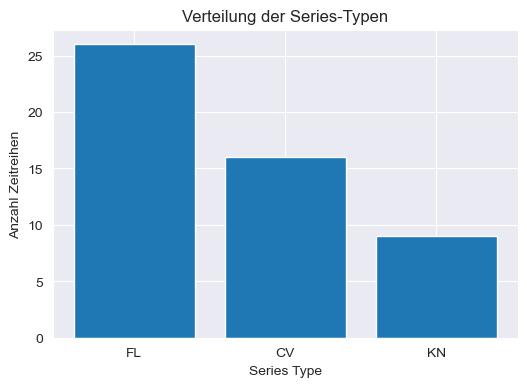

,Anzahl
FL,26
CV,16
KN,9


In [11]:
# 1. Nur die Typen ('FL', 'KN', 'CV') extrahieren
types = [pk[:2] for pk in primary_keys]

# 2. Häufigkeiten zählen
counts = Counter(types)

# 3. Als Balkendiagramm darstellen
plt.figure(figsize=(6,4))
plt.bar(counts.keys(), counts.values())
plt.xlabel('Series Type')
plt.ylabel('Anzahl Zeitreihen')
plt.title('Verteilung der Series-Typen')
plt.show()

# 4. (Optional) Als DataFrame anzeigen
df_counts = pd.DataFrame.from_dict(counts, orient='index', columns=['Anzahl'])
df_counts

In [12]:
identifiers = [key.split('Menge', 1)[1] for key in keys if 'Menge' in key]

# 3. Einzigartige Identifier bestimmen und sortieren
unique_identifiers = sorted(set(identifiers))

# 4. Ausgabe
print("Einzigartige Identifier nach '.Menge':")
for ident in unique_identifiers:
    print(ident)

Einzigartige Identifier nach '.Menge':

.1
GA
HH
HH.2
KW


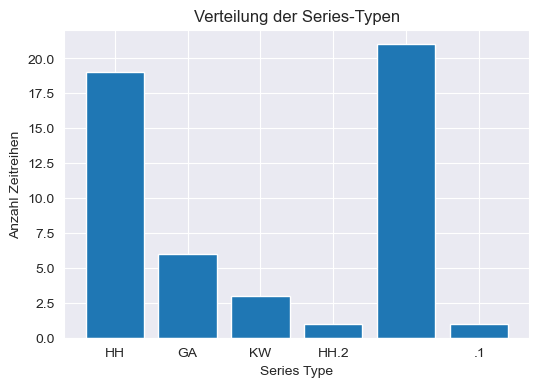

In [13]:
counts_types = Counter(identifiers)

# 3. Als Balkendiagramm darstellen
plt.figure(figsize=(6,4))
plt.bar(counts_types.keys(), counts_types.values())
plt.xlabel('Series Type')
plt.ylabel('Anzahl Zeitreihen')
plt.title('Verteilung der Series-Typen')
plt.show()

In [38]:
csv_path = os.path.join('..', 'data', 'gdm_ausspp_202505011423.csv')

# 2. Laden
df_knoten = pd.read_csv(csv_path)
df_knoten.head()

C:\Users\johan\AppData\Local\Temp\ipykernel_4504\4094773399.py:4: DtypeWarning: Columns (18,19,31,32,33,34,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_knoten = pd.read_csv(csv_path)


,ausspp_id,nemesys_key,name,typ,station_id,betr,nbname,kname,at_nr,buchbar,...,periode,ablese,version_id,geom_g,geom_s1,klarname,h2_anteil,brennwertbezirk,mehrfach_ep,mengen_gen
0,1057060,KN_00370061,TEST_ZR_neu,1,29501.0,10002.0,NaN,NaN,NaN,0.0,...,NaN,NaN,2010,POINT (467432.38972410024 5298251.233962588),NaN,REKO_DL_SNG,NaN,NaN,NaN,NaN
1,1167717,KN_00400891,VAP_11_01,7,381704.0,11828.0,NaN,NaN,NaN,2.0,...,NaN,NaN,2012,POINT (638160.7506623925 5317827.993315005),NaN,NaN,NaN,NaN,NaN,NaN
2,1168161,KN_00400949,VAP_11_55,7,381704.0,11828.0,NaN,NaN,NaN,2.0,...,NaN,NaN,2018,POINT (639183.4338244994 5316622.424836051),NaN,NaN,NaN,NaN,NaN,NaN
3,1137248,KN_00397400,38302611_11_235,3,372131.0,11828.0,11627,G3E_FID: 38302611 ; BTI_OBJ_NR: 11627,NaN,1.0,...,NaN,NaN,2012,POINT (638188.4998389793 5317801.508679103),NaN,REKO_DL_NBG,NaN,235,NaN,NaN
4,1137527,KN_00397666,38302621_11_251,3,372131.0,11828.0,63341,G3E_FID: 38302621 ; BTI_OBJ_NR: 63341,NaN,1.0,...,NaN,NaN,2012,POINT (638206.87598522 5317780.619306837),NaN,REKO_DL_NBG,NaN,251,NaN,NaN


In [17]:
csv_path = os.path.join('..', 'data', 'gdm_mengem_202505011301.csv')

# 2. Laden
df_punkte = pd.read_csv(csv_path)
df_punkte.head()

,mengem_id,nemesys_key,name,typ,station_id,betr,nbname,anzms,idm,durchm,...,new_date,mod_date,uebtrag,hydrel,marktgebiet,version_id,geom_g,geom_s1,klarname,h2_anteil
0,996388,CV_00355719,TEst_WebGIS_edit,7,32845,10037.0,Wien,2.0,289.0,NaN,...,2021-12-10 16:05:22.960,2021-12-10 16:05:22.960,1.0,0,Ost,2005,LINESTRING (406803.627076863 5249919.785140501...,NaN,VIE,8.6
1,314199,CV_00003203,NNÖDürn.West2.Q,0,38281,11938.0,NOE.WEST.DUERNROH...FY.MW,0.0,590.0,0.0,...,2021-12-10 16:05:22.961,2021-12-10 16:05:22.961,0.0,0,Ost,2005,"LINESTRING (568836.266970327 5353561.28787479,...","LINESTRING (531376.180468073 5364547.85353879,...",NaN,NaN
2,34736,CV_00001904,OÖFSS311.HDL031.Q,0,33600,12008.0,OOE.VN.LGWTURBI.AS026..FY_GA.MW,0.0,NaN,0.0,...,2021-12-10 16:05:22.961,2021-12-10 16:05:22.961,0.0,0,Ost,2005,"LINESTRING (450596.590552117 5345185.83351994,...","LINESTRING (462474.277553419 5345659.32920793,...",NaN,NaN
3,34739,CV_00007908,OÖFSS312.HDL031.Q,0,33548,12008.0,OOE.VN.VOESTGT.AS152..FY_GA.MW,0.0,NaN,0.0,...,2021-12-10 16:05:22.961,2021-12-10 16:05:22.961,0.0,0,Ost,2005,"LINESTRING (449404.305353361 5347883.3247626, ...","LINESTRING (463340.951379113 5352214.90522529,...",NaN,NaN
4,627087,CV_00346063,LGVRugg.DRMRugg.Q\r\n,0,626972,10109.0,NaN,0.0,262.0,5.0,...,2021-12-10 16:05:22.961,2021-12-10 16:05:22.961,0.0,0,Liechtenstein,2005,"LINESTRING (85828.8911295151 5247432.35926299,...","LINESTRING (85828.8911295151 5247432.35926299,...",NaN,NaN


In [34]:
csv_path = os.path.join('..', 'data', 'gdm_verbz_202505011429.csv')

# 2. Laden
df_flaechen = pd.read_csv(csv_path)
df_flaechen.head()

,verbz_id,nemesys_key,name,nbname,beschr,komm,new_date,mod_date,rand_color,geom_g
0,918985,FL_00352230,T_01_Tirol,TIGAS-Erdgas Tirol GmbH,Unterland,#3a5fcd,NaN,NaN,#3a5fcd,MULTIPOLYGON (((208215.759904525 5208466.07990...
1,916754,FL_00025297,ST_02_Semmering,Energienetze Steiermark GmbH,Semmering,#cdbe70,NaN,NaN,#cdbe70,MULTIPOLYGON (((505580.726745652 5275506.84887...
2,918988,FL_00025241,ST_06_Grafendorf,Energienetze Steiermark GmbH,Grafendorf,#ee8262,NaN,NaN,#ee8262,MULTIPOLYGON (((576611.379498681 5233885.47556...
3,918989,FL_00352191,B_03_Oberwart,Netz Burgenland Erdgas GmbH,Oberwart,#a2cd5a,NaN,NaN,#a2cd5a,MULTIPOLYGON (((585315.470109405 5225725.82005...
4,478644,FL_00024679,OÖ_16_Windischgarsten,Netz Oberösterreich GmbH,Windischgarsten,#6b8e23,NaN,NaN,#6b8e23,MULTIPOLYGON (((440464.093530326 5287677.48503...


In [21]:
pk_fl = [pk for pk in primary_keys if pk.startswith('FL_')]
pk_kn = [pk for pk in primary_keys if pk.startswith('KN_')]
pk_cv = [pk for pk in primary_keys if pk.startswith('CV_')]


In [36]:
len(pk_fl)

26

In [37]:
df_fl = df_flaechen.loc[
    df_flaechen['nemesys_key'].isin(pk_fl),
    ['nemesys_key','geom_g']
].drop_duplicates(subset='nemesys_key', keep='first')


df_fl

,nemesys_key,geom_g
2,FL_00025241,MULTIPOLYGON (((576611.379498681 5233885.47556...
3,FL_00352191,MULTIPOLYGON (((585315.470109405 5225725.82005...
5,FL_00020896,MULTIPOLYGON (((442366.697798016 5277755.65335...
10,FL_00024730,MULTIPOLYGON (((458466.07960983 5343618.499366...
11,FL_00024735,MULTIPOLYGON (((455813.69099947 5345132.902266...
14,FL_00352244,MULTIPOLYGON (((445856.374990906 5365743.91906...
18,FL_00352430,MULTIPOLYGON (((484559.218368485 5193207.33573...
20,FL_00024731,MULTIPOLYGON (((449827.987549417 5340014.16225...
25,FL_00352054,MULTIPOLYGON (((168517.508101939 5271056.46775...
26,FL_00352189,MULTIPOLYGON (((604720.060484524 5244360.40220...


In [39]:
df_kn = df_knoten.loc[
    df_knoten['nemesys_key'].isin(pk_kn),
    ['nemesys_key','geom_g']
].drop_duplicates(subset='nemesys_key', keep='first')

df_kn

,nemesys_key,geom_g
180,KN_00001613,POINT (450734.776267296 5348285.84986857)
250,KN_00001886,POINT (450611.961082289 5345185.86386357)
782,KN_00000067,POINT (348607.848889366 5297852.03056291)
822,KN_00000069,POINT (343967.14792847 5313574.25495751)
903,KN_00001602,POINT (450569.747572944 5350088.14790274)
1286,KN_00000073,POINT (369183.552819 5318677.1276634)


In [47]:
df_cv = df_punkte.loc[
    df_punkte['nemesys_key'].isin(pk_cv),
    ['nemesys_key','geom_g']
].drop_duplicates(subset='nemesys_key', keep='first')

df_cv

,nemesys_key,geom_g
46,CV_00007270,"LINESTRING (495139.923586289 5168858.53083316,..."
69,CV_00007809,"LINESTRING (467860.514403169 5166803.53965425,..."
71,CV_00003094,"LINESTRING (526054.604836417 5177242.27772937,..."
113,CV_00007283,"LINESTRING (449767.375146095 5160803.15400325,..."
115,CV_00007300,"LINESTRING (414328.712057598 5157201.42221358,..."
126,CV_00348266,"LINESTRING (392147.529330797 5313778.26758383,..."
159,CV_00003432,"LINESTRING (103863.91923287 5279448.80541387, ..."
205,CV_00001876,"LINESTRING (361533.564776843 5315287.04147033,..."
225,CV_00003083,"LINESTRING (577073.151811071 5243467.79904798,..."
227,CV_00003089,"LINESTRING (556681.13170542 5211089.53371581, ..."


In [30]:
df_cv_unique = df_cv.drop_duplicates(subset='nemesys_key', keep='first')
df_cv_unique

,nemesys_key,geom_g
46,CV_00007270,"LINESTRING (495139.923586289 5168858.53083316,..."
69,CV_00007809,"LINESTRING (467860.514403169 5166803.53965425,..."
71,CV_00003094,"LINESTRING (526054.604836417 5177242.27772937,..."
113,CV_00007283,"LINESTRING (449767.375146095 5160803.15400325,..."
115,CV_00007300,"LINESTRING (414328.712057598 5157201.42221358,..."
126,CV_00348266,"LINESTRING (392147.529330797 5313778.26758383,..."
159,CV_00003432,"LINESTRING (103863.91923287 5279448.80541387, ..."
205,CV_00001876,"LINESTRING (361533.564776843 5315287.04147033,..."
225,CV_00003083,"LINESTRING (577073.151811071 5243467.79904798,..."
227,CV_00003089,"LINESTRING (556681.13170542 5211089.53371581, ..."


In [33]:
pk_fl

['FL_00024702',
 'FL_00024730',
 'FL_00352243',
 'FL_00352244',
 'FL_00352244',
 'FL_00024360',
 'FL_00352254',
 'FL_00025248',
 'FL_00024360',
 'FL_00024731',
 'FL_00024735',
 'FL_00024667',
 'FL_00352218',
 'FL_00025240',
 'FL_00025241',
 'FL_00020896',
 'FL_00342704',
 'FL_00352054',
 'FL_00352254',
 'FL_00352244',
 'FL_00342704',
 'FL_00352191',
 'FL_00352189',
 'FL_00352430',
 'FL_00352208',
 'FL_00024616']

In [48]:
df_mapping = pd.concat([df_fl, df_kn, df_cv], axis=0, ignore_index=True)

In [49]:
mapped_keys = df_mapping['nemesys_key'].tolist()

unmatched = sorted(set(primary_keys) - set(mapped_keys))

unmatched

[]

In [50]:
df_mapping

,nemesys_key,geom_g
0,FL_00025241,MULTIPOLYGON (((576611.379498681 5233885.47556...
1,FL_00352191,MULTIPOLYGON (((585315.470109405 5225725.82005...
2,FL_00020896,MULTIPOLYGON (((442366.697798016 5277755.65335...
3,FL_00024730,MULTIPOLYGON (((458466.07960983 5343618.499366...
4,FL_00024735,MULTIPOLYGON (((455813.69099947 5345132.902266...
5,FL_00352244,MULTIPOLYGON (((445856.374990906 5365743.91906...
6,FL_00352430,MULTIPOLYGON (((484559.218368485 5193207.33573...
7,FL_00024731,MULTIPOLYGON (((449827.987549417 5340014.16225...
8,FL_00352054,MULTIPOLYGON (((168517.508101939 5271056.46775...
9,FL_00352189,MULTIPOLYGON (((604720.060484524 5244360.40220...


In [53]:
unique_primary = set(primary_keys)
mapped_keys = set(df_mapping['nemesys_key'].astype(str).str.strip())

# 3. Differenz bilden
unmatched = unique_primary - mapped_keys

print("Anzahl unique primary keys:", len(unique_primary))
print("Anzahl gemappter keys:",         len(mapped_keys))
print("Anzahl unmatched:",              len(unmatched))
print("Unmatched keys:",                 sorted(unmatched))

Anzahl unique primary keys: 43
Anzahl gemappter keys: 43
Anzahl unmatched: 0
Unmatched keys: []


In [55]:
counts = Counter(primary_keys)

# 3. Filtere diejenigen mit mehr als 1 Vorkommen
duplicates = [pk for pk, cnt in counts.items() if cnt > 1]

print("Primary Keys mit Duplikaten:")
for pk in duplicates:
    print(f"{pk}  (Vorkommen: {counts[pk]})")

Primary Keys mit Duplikaten:
FL_00352244  (Vorkommen: 3)
FL_00024360  (Vorkommen: 2)
FL_00352254  (Vorkommen: 2)
FL_00342704  (Vorkommen: 2)
KN_00001613  (Vorkommen: 2)
KN_00001886  (Vorkommen: 2)
KN_00001602  (Vorkommen: 2)


In [59]:
df_mapping['geometry'] = df_mapping['geom_g'].apply(wkt.loads)

In [60]:
gdf = gpd.GeoDataFrame(df_mapping, geometry='geometry', crs='EPSG:32633')

In [63]:
countries_url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world = gpd.read_file(countries_url)
if 'ADMIN' in world.columns:
    austria = world[world['ADMIN'] == 'Austria'].to_crs(gdf.crs)
else:
    austria = world[world['name'] == 'Austria'].to_crs(gdf.crs)

In [68]:
polygons = gdf[gdf.geometry.geom_type.isin(['Polygon','MultiPolygon'])]
lines    = gdf[gdf.geometry.geom_type.isin(['LineString','MultiLineString'])]
points   = gdf[gdf.geometry.geom_type == 'Point']

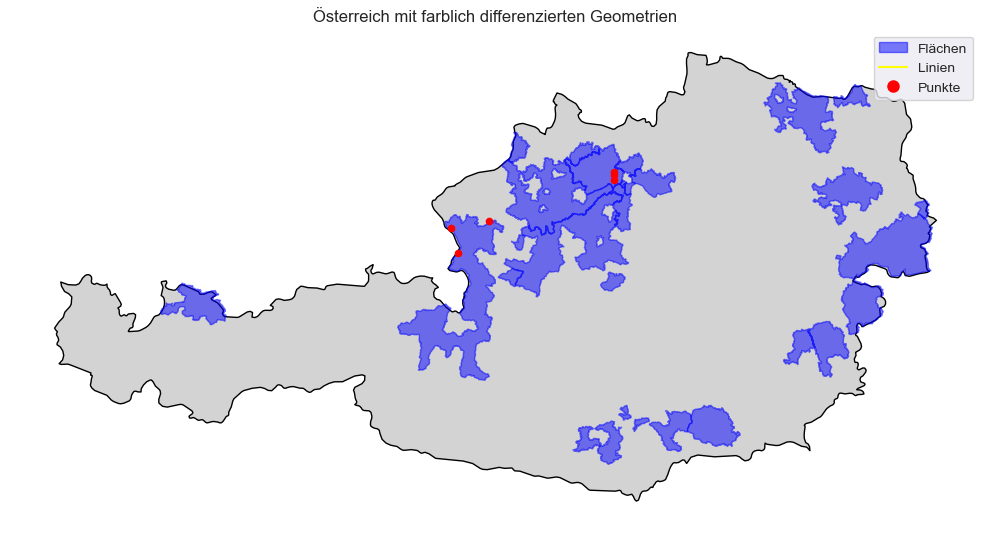

In [78]:
# 5. Plot bauen
fig, ax = plt.subplots(figsize=(10,10))
austria.plot(ax=ax, color='lightgray', edgecolor='black')

polygons.plot(ax=ax,
              facecolor='blue',
              edgecolor='blue',
              alpha=0.5)
lines.plot(ax=ax,
           color='black',
           linewidth=2,
           zorder=2)
points.plot(ax=ax,
            color='red',
            markersize=20)

ax.set_title("Österreich mit farblich differenzierten Geometrien")
ax.set_axis_off()

# 6. Manuelle Legende
legend_elements = [
    Patch(facecolor='blue', edgecolor='blue', alpha=0.5, label='Flächen'),
    Line2D([0], [0], color='yellow', lw=1.5, label='Linien'),
    Line2D([0], [0], marker='o', color='red', linestyle='', markersize=8, label='Punkte'),
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

In [72]:
print(gdf.geometry.geom_type.value_counts())

MultiPolygon    21
LineString      16
Point            6
Name: count, dtype: int64


,nemesys_key,geom_g,geometry
0,FL_00025241,MULTIPOLYGON (((576611.379498681 5233885.47556...,"MULTIPOLYGON (((576611.379 5233885.476, 576597..."
1,FL_00352191,MULTIPOLYGON (((585315.470109405 5225725.82005...,"MULTIPOLYGON (((585315.47 5225725.82, 585316.0..."
2,FL_00020896,MULTIPOLYGON (((442366.697798016 5277755.65335...,"MULTIPOLYGON (((442366.698 5277755.653, 442250..."
3,FL_00024730,MULTIPOLYGON (((458466.07960983 5343618.499366...,"MULTIPOLYGON (((458466.08 5343618.499, 458464...."
4,FL_00024735,MULTIPOLYGON (((455813.69099947 5345132.902266...,"MULTIPOLYGON (((455813.691 5345132.902, 455810..."
5,FL_00352244,MULTIPOLYGON (((445856.374990906 5365743.91906...,"MULTIPOLYGON (((445856.375 5365743.919, 445856..."
6,FL_00352430,MULTIPOLYGON (((484559.218368485 5193207.33573...,"MULTIPOLYGON (((484559.218 5193207.336, 484563..."
7,FL_00024731,MULTIPOLYGON (((449827.987549417 5340014.16225...,"MULTIPOLYGON (((449827.988 5340014.162, 449829..."
8,FL_00352054,MULTIPOLYGON (((168517.508101939 5271056.46775...,"MULTIPOLYGON (((168517.508 5271056.468, 168586..."
9,FL_00352189,MULTIPOLYGON (((604720.060484524 5244360.40220...,"MULTIPOLYGON (((604720.06 5244360.402, 604761...."


In [82]:
#os.makedirs('data', exist_ok=True)
gpkg_path = os.path.join('..', 'data', 'df_mapping.gpkg')

# Speichere als GeoPackage
gdf.to_file(gpkg_path, layer='mapping', driver='GPKG')

print("GeoPackage gespeichert unter:", gpkg_path)

GeoPackage gespeichert unter: ..\data\df_mapping.gpkg


In [6]:

gpkg_path = os.path.join('..', 'data', 'df_mapping.gpkg')
df_mapping = gpd.read_file(gpkg_path)


In [7]:
df_mapping

,nemesys_key,geom_g,geometry
0,FL_00025241,MULTIPOLYGON (((576611.379498681 5233885.47556...,"MULTIPOLYGON (((576611.379 5233885.476, 576597..."
1,FL_00352191,MULTIPOLYGON (((585315.470109405 5225725.82005...,"MULTIPOLYGON (((585315.47 5225725.82, 585316.0..."
2,FL_00020896,MULTIPOLYGON (((442366.697798016 5277755.65335...,"MULTIPOLYGON (((442366.698 5277755.653, 442250..."
3,FL_00024730,MULTIPOLYGON (((458466.07960983 5343618.499366...,"MULTIPOLYGON (((458466.08 5343618.499, 458464...."
4,FL_00024735,MULTIPOLYGON (((455813.69099947 5345132.902266...,"MULTIPOLYGON (((455813.691 5345132.902, 455810..."
5,FL_00352244,MULTIPOLYGON (((445856.374990906 5365743.91906...,"MULTIPOLYGON (((445856.375 5365743.919, 445856..."
6,FL_00352430,MULTIPOLYGON (((484559.218368485 5193207.33573...,"MULTIPOLYGON (((484559.218 5193207.336, 484563..."
7,FL_00024731,MULTIPOLYGON (((449827.987549417 5340014.16225...,"MULTIPOLYGON (((449827.988 5340014.162, 449829..."
8,FL_00352054,MULTIPOLYGON (((168517.508101939 5271056.46775...,"MULTIPOLYGON (((168517.508 5271056.468, 168586..."
9,FL_00352189,MULTIPOLYGON (((604720.060484524 5244360.40220...,"MULTIPOLYGON (((604720.06 5244360.402, 604761...."


In [9]:
resp = requests.get("https://dataset.api.hub.geosphere.at/v1/datasets")
resp.raise_for_status()
datasets = resp.json()

In [18]:
datasets

{'/grid/historical/apolis_short-v1-1d-100m': {'type': 'grid',
  'mode': 'historical',
  'response_formats': ['geojson', 'netcdf'],
  'url': 'https://dataset.api.hub.geosphere.at/v1/grid/historical/apolis_short-v1-1d-100m'},
 '/timeseries/historical/apolis_short-v1-1d-100m': {'type': 'timeseries',
  'mode': 'historical',
  'response_formats': ['geojson', 'csv'],
  'url': 'https://dataset.api.hub.geosphere.at/v1/timeseries/historical/apolis_short-v1-1d-100m'},
 '/station/historical/histalp-v1-1y': {'type': 'station',
  'mode': 'historical',
  'response_formats': ['geojson', 'csv'],
  'url': 'https://dataset.api.hub.geosphere.at/v1/station/historical/histalp-v1-1y'},
 '/grid/historical/inca-v1-1h-1km': {'type': 'grid',
  'mode': 'historical',
  'response_formats': ['geojson', 'netcdf'],
  'url': 'https://dataset.api.hub.geosphere.at/v1/grid/historical/inca-v1-1h-1km'},
 '/timeseries/historical/inca-v1-1h-1km': {'type': 'timeseries',
  'mode': 'historical',
  'response_formats': ['geojson'

In [19]:
# 1. Rohdaten abrufen
resp = requests.get("https://dataset.api.hub.geosphere.at/v1/datasets")
resp.raise_for_status()
datasets = resp.json()  # das ist ein dict

# 2. In eine Liste von Records umwandeln
records = []
for path, meta in datasets.items():
    # Resource-ID ist das letzte Segment im Pfad
    resource_id = path.split('/')[-1]
    records.append({
        'resource_id': resource_id,
        'type':        meta.get('type'),
        'mode':        meta.get('mode'),
        'url':         meta.get('url')
    })

# 3. DataFrame bauen
ds_df = pd.DataFrame(records)

# 4. Filtern auf station + historical
station_hist = ds_df[
    (ds_df['type'] == 'station') &
    (ds_df['mode'] == 'historical')
].sort_values('resource_id')

print("Gefundene station/historical resource_ids:")
print(station_hist[['resource_id','url']])

Gefundene station/historical resource_ids:
       resource_id                                                url
2    histalp-v1-1y  https://dataset.api.hub.geosphere.at/v1/statio...
30  klima-v1-10min  https://dataset.api.hub.geosphere.at/v1/statio...
27     klima-v1-1d  https://dataset.api.hub.geosphere.at/v1/statio...
28     klima-v1-1h  https://dataset.api.hub.geosphere.at/v1/statio...
29     klima-v1-1m  https://dataset.api.hub.geosphere.at/v1/statio...
34  klima-v2-10min  https://dataset.api.hub.geosphere.at/v1/statio...
31     klima-v2-1d  https://dataset.api.hub.geosphere.at/v1/statio...
32     klima-v2-1h  https://dataset.api.hub.geosphere.at/v1/statio...
33     klima-v2-1m  https://dataset.api.hub.geosphere.at/v1/statio...
35     klima-v2-1y  https://dataset.api.hub.geosphere.at/v1/statio...
36  tawes-v1-10min  https://dataset.api.hub.geosphere.at/v1/statio...


In [23]:
# 1. Resource-ID für stündliche Klimastationen
resource_id = 'klima-v2-1h'

# 2. Metadata-Endpoint ansprechen
url_meta  = f"https://dataset.api.hub.geosphere.at/v1/station/historical/{resource_id}/metadata"
resp_meta = requests.get(url_meta)
resp_meta.raise_for_status()

# 3. Liste der Station-Dicts rausziehen
data = resp_meta.json()          # {'stations': [ {...}, {...}, … ]}
stations_list = data['stations']

# 4. In DataFrame umwandeln
stations_df = pd.DataFrame.from_records(stations_list)

# 5. Wichtige Spalten anzeigen
print("Spalten:", stations_df.columns.tolist())
print(stations_df[['id','name','lat','lon']].head())

Spalten: ['type', 'id', 'group_id', 'name', 'state', 'lat', 'lon', 'altitude', 'valid_from', 'valid_to', 'has_sunshine', 'has_global_radiation', 'is_active']
   id              name       lat       lon
0   1            Aflenz  47.54594  15.24069
1   2  Aigen im Ennstal  47.53278  14.13826
2   3       Allentsteig  48.69083  15.36694
3   4         Amstetten  48.10889  14.89500
4   5        Bad Aussee  47.61050  13.75844


In [25]:
stations_df.type.unique() # combined und individual station

array(['COMBINED', 'INDIVIDUAL'], dtype=object)

In [30]:
resource_id = 'klima-v2-1h'

# 2. Metadata abrufen
url_meta  = f"https://dataset.api.hub.geosphere.at/v1/station/historical/{resource_id}/metadata"
resp_meta = requests.get(url_meta)
resp_meta.raise_for_status()

# 3. Alle verfügbaren Metadaten-Typen anzeigen
meta = resp_meta.json()
print("Verfügbare Metadata-Typen:", list(meta.keys()))



Verfügbare Metadata-Typen: ['stations', 'parameters', 'title', 'frequency', 'type', 'mode', 'response_formats', 'start_time', 'end_time', 'id_type']


In [27]:
params = meta['parameters']  # meta ist dein Dict aus resp_meta.json()

# 2. In DataFrame umwandeln und Spalten anschauen
df_params = pd.json_normalize(params)
print("Spalten in df_params:", df_params.columns.tolist())
print(df_params.head())

Spalten in df_params: ['name', 'long_name', 'description', 'unit', 'code_list']
        name                                       long_name  \
0       cglo                      Globalstrahlung Mittelwert   
1  cglo_flag    Qualitätsflag für Globalstrahlung Mittelwert   
2         dd                    Windrichtung 360° Mittelwert   
3    dd_flag  Qualitätsflag für Windrichtung 360° Mittelwert   
4        ddx                     Windrichtung zur Spitzenböe   

                                         description  unit  \
0   Globalstrahlung, kalibrierter Stunden-Mittelwert  W/m²   
1  Qualitätsflag für Globalstrahlung, kalibrierte...  code   
2  Windrichtung [360°], vektorieller Stunden-Mitt...     °   
3  Qualitätsflag für Windrichtung [360°], vektori...  code   
4  Windrichtung der maximalen Windgeschwindigkeit...     °   

                                           code_list  
0                                                NaN  
1  [{'key': None, 'value': 'undefiniert'}, {'key'...

In [29]:
df_params[['name','long_name','unit']]

,name,long_name,unit
0,cglo,Globalstrahlung Mittelwert,W/m²
1,cglo_flag,Qualitätsflag für Globalstrahlung Mittelwert,code
2,dd,Windrichtung 360° Mittelwert,°
3,dd_flag,Qualitätsflag für Windrichtung 360° Mittelwert,code
4,ddx,Windrichtung zur Spitzenböe,°
5,ddx_flag,Qualitätsflag für Windrichtung zur Spitzenböe,code
6,ff,Windgeschwindigkeit,m/s
7,ff_flag,Qualitätsflag für Windgeschwindigkeit,code
8,ffx,Maximale Windgeschwindigkeit (Spitzenböe),m/s
9,ffx_flag,Qualitätsflag für Maximale Windgeschwindigkeit...,code


In [31]:
weather_params = [
    'tl'    ,  # Lufttemperatur 2 m (°C)
    'rf'    ,  # Relative Feuchte (%)
    'ff'    ,  # Mittlere Windgeschwindigkeit (m/s)
    'ffx'   ,  # Maximale Windgeschwindigkeit / Spitzenböe (m/s)
    'cglo'  ,  # Globalstrahlung (W/m²)
    'so_h'  ,  # Sonnenscheindauer (h)
    'rr'    ,  # Niederschlag (mm)
    'rrm'   ,  # Niederschlagsdauer (min)
    'tb10'  ,  # Bodentemperatur –10 cm (°C)
    'tb20'     # Bodentemperatur –20 cm (°C)
]

In [33]:
gdf = gpd.GeoDataFrame(df_mapping, geometry='geometry', crs='EPSG:32633')

# 2. In WGS84 (EPSG:4326) transformieren, um lat/lon zu bekommen
gdf_wgs = gdf.to_crs('EPSG:4326')

# 3. Centroid berechnen (Point für jeden Geometrietyp)
gdf_wgs['centroid'] = gdf_wgs.geometry.centroid

# 4. Lat/Lon extrahieren
gdf_wgs['centroid_lon'] = gdf_wgs.centroid.x
gdf_wgs['centroid_lat'] = gdf_wgs.centroid.y

# 5. Ergebnis prüfen
gdf_wgs.head()

C:\Users\johan\AppData\Local\Temp\ipykernel_28584\3046659748.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_wgs['centroid'] = gdf_wgs.geometry.centroid
C:\Users\johan\AppData\Local\Temp\ipykernel_28584\3046659748.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_wgs['centroid_lon'] = gdf_wgs.centroid.x
C:\Users\johan\AppData\Local\Temp\ipykernel_28584\3046659748.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_wgs['centroid_lat'] = gdf_wgs.centroid.y


,nemesys_key,geom_g,geometry,centroid,centroid_lon,centroid_lat
0,FL_00025241,MULTIPOLYGON (((576611.379498681 5233885.47556...,"MULTIPOLYGON (((16.01252 47.25398, 16.01233 47...",POINT (15.95042 47.28496),15.950422,47.284960
1,FL_00352191,MULTIPOLYGON (((585315.470109405 5225725.82005...,"MULTIPOLYGON (((16.12598 47.17949, 16.12598 47...",POINT (16.18855 47.28811),16.188552,47.288110
2,FL_00020896,MULTIPOLYGON (((442366.697798016 5277755.65335...,"MULTIPOLYGON (((14.23255 47.65063, 14.23103 47...",POINT (14.33164 47.66011),14.331640,47.660108
3,FL_00024730,MULTIPOLYGON (((458466.07960983 5343618.499366...,"MULTIPOLYGON (((14.44056 48.24442, 14.44054 48...",POINT (14.46088 48.21056),14.460877,48.210563
4,FL_00024735,MULTIPOLYGON (((455813.69099947 5345132.902266...,"MULTIPOLYGON (((14.40468 48.25787, 14.40464 48...",POINT (14.41438 48.23478),14.414382,48.234777


In [34]:
gdf_wgs.columns

Index(['nemesys_key', 'geom_g', 'geometry', 'centroid', 'centroid_lon',
       'centroid_lat'],
      dtype='object')

,nemesys_key,geom_g,geometry
0,FL_00025241,MULTIPOLYGON (((576611.379498681 5233885.47556...,"MULTIPOLYGON (((576611.379 5233885.476, 576597..."
1,FL_00352191,MULTIPOLYGON (((585315.470109405 5225725.82005...,"MULTIPOLYGON (((585315.47 5225725.82, 585316.0..."
2,FL_00020896,MULTIPOLYGON (((442366.697798016 5277755.65335...,"MULTIPOLYGON (((442366.698 5277755.653, 442250..."
3,FL_00024730,MULTIPOLYGON (((458466.07960983 5343618.499366...,"MULTIPOLYGON (((458466.08 5343618.499, 458464...."
4,FL_00024735,MULTIPOLYGON (((455813.69099947 5345132.902266...,"MULTIPOLYGON (((455813.691 5345132.902, 455810..."
5,FL_00352244,MULTIPOLYGON (((445856.374990906 5365743.91906...,"MULTIPOLYGON (((445856.375 5365743.919, 445856..."
6,FL_00352430,MULTIPOLYGON (((484559.218368485 5193207.33573...,"MULTIPOLYGON (((484559.218 5193207.336, 484563..."
7,FL_00024731,MULTIPOLYGON (((449827.987549417 5340014.16225...,"MULTIPOLYGON (((449827.988 5340014.162, 449829..."
8,FL_00352054,MULTIPOLYGON (((168517.508101939 5271056.46775...,"MULTIPOLYGON (((168517.508 5271056.468, 168586..."
9,FL_00352189,MULTIPOLYGON (((604720.060484524 5244360.40220...,"MULTIPOLYGON (((604720.06 5244360.402, 604761...."


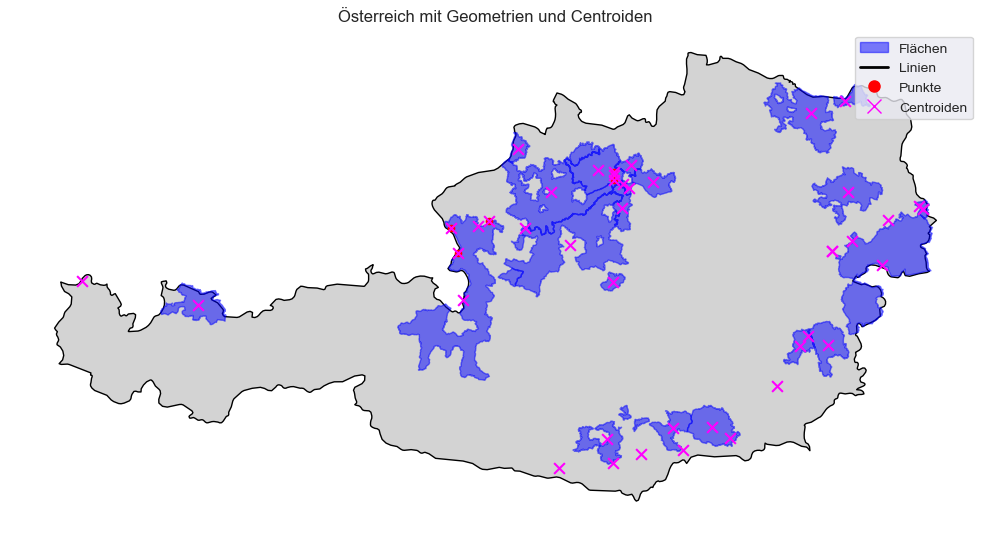

In [36]:
df_mapping['geometry'] = df_mapping['geom_g'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df_mapping, geometry='geometry', crs='EPSG:32633')

# 2. Centroid direkt in gdf berechnen (in EPSG:32633)
gdf['centroid'] = gdf.geometry.centroid

# 3. Österreich-Grenze laden und in Dein CRS holen
countries_url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world        = gpd.read_file(countries_url)
if 'ADMIN' in world.columns:
    austria = world[world['ADMIN']=='Austria'].to_crs(gdf.crs)
else:
    austria = world[world['name']=='Austria'].to_crs(gdf.crs)

# 4. Layer nach Typ
polygons = gdf[gdf.geometry.geom_type.isin(['Polygon','MultiPolygon'])]
lines    = gdf[gdf.geometry.geom_type.isin(['LineString','MultiLineString'])]
points   = gdf[gdf.geometry.geom_type == 'Point']

# 5. Ein GeoDataFrame nur für Centroiden
centroids = gpd.GeoDataFrame(gdf, geometry='centroid', crs=gdf.crs)

# 6. Plot aufbauen
fig, ax = plt.subplots(figsize=(10,10))
# Background
austria.plot(ax=ax, color='lightgray', edgecolor='black', zorder=0)

# Deine Geometrien
polygons.plot(ax=ax, facecolor='blue',  edgecolor='blue',  alpha=0.5, zorder=1)
lines   .plot(ax=ax, color='black', linewidth=2,               zorder=2)
points  .plot(ax=ax, color='red',   markersize=20,             zorder=3)

# Centroiden
centroids.plot(ax=ax,
               color='magenta',
               marker='x',
               markersize=60,
               zorder=4)

# 7. Legende manuell
legend_elems = [
    Patch(facecolor='blue', edgecolor='blue', alpha=0.5, label='Flächen'),
    Line2D([0],[0], color='black',   lw=2,   label='Linien'),
    Line2D([0],[0], marker='o', color='red',   linestyle='', markersize=8, label='Punkte'),
    Line2D([0],[0], marker='x', color='magenta', linestyle='', markersize=10, label='Centroiden'),
]
ax.legend(handles=legend_elems, loc='upper right')

ax.set_title("Österreich mit Geometrien und Centroiden")
ax.set_axis_off()
plt.tight_layout()
plt.show()

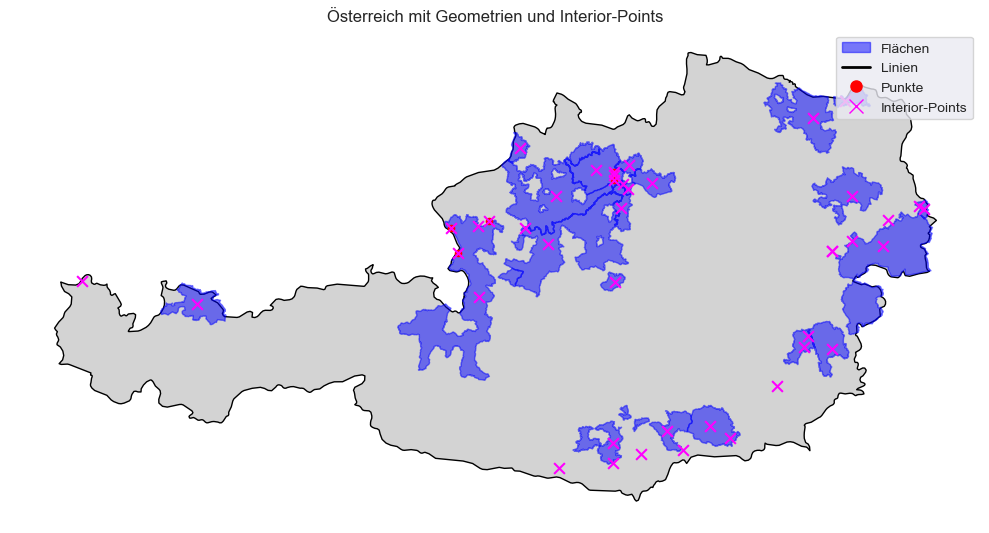

In [38]:
# 1. GeoDataFrame laden (EPSG:32633 mit df_mapping['geometry'] schon vorhanden)
df_mapping['geometry'] = df_mapping['geom_g'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df_mapping, geometry='geometry', crs='EPSG:32633')

# 2. Interior-Punkt berechnen
# representative_point() liefert einen Punkt im Inneren der Geometrie
gdf['pt_interior'] = gdf.geometry.apply(lambda geom: geom.representative_point())

# 3. Österreich-Grenze laden
countries_url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world        = gpd.read_file(countries_url)
austria      = (world[world['name']=='Austria']
                   .to_crs(gdf.crs))

# 4. Layers splitten
polygons = gdf[gdf.geometry.geom_type.isin(['Polygon','MultiPolygon'])]
lines    = gdf[gdf.geometry.geom_type.isin(['LineString','MultiLineString'])]
points   = gdf[gdf.geometry.geom_type == 'Point']

# 5. GeoDataFrame für die interior-Punkte
pts_interior = gpd.GeoDataFrame(gdf, geometry='pt_interior', crs=gdf.crs)

# 6. Plot
fig, ax = plt.subplots(figsize=(10,10))
austria.plot(ax=ax, color='lightgray', edgecolor='black', zorder=0)

polygons.plot(ax=ax, facecolor='blue', edgecolor='blue', alpha=0.5, zorder=1)
lines   .plot(ax=ax, color='black', linewidth=2, zorder=2)
points  .plot(ax=ax, color='red', markersize=20, zorder=3)

# Interior-Punkte
pts_interior.plot(
    ax=ax,
    color='magenta',
    marker='x',
    markersize=60,
    zorder=4,
    label='Interior-Points'
)

# 7. Legende
legend_elems = [
    Patch(facecolor='blue', edgecolor='blue', alpha=0.5, label='Flächen'),
    Line2D([0],[0], color='black', lw=2, label='Linien'),
    Line2D([0],[0], marker='o', color='red', linestyle='', markersize=8, label='Punkte'),
    Line2D([0],[0], marker='x', color='magenta', linestyle='', markersize=10, label='Interior-Points'),
]
ax.legend(handles=legend_elems, loc='upper right')

ax.set_title("Österreich mit Geometrien und Interior-Points")
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [41]:
gdf_wgs = gdf.rename(columns={'pt_interior': 'centroid'})
gdf_wgs['centroid_lon'] = gdf_wgs.centroid.x
gdf_wgs['centroid_lat'] = gdf_wgs.centroid.y
gdf_wgs.head()

,nemesys_key,geom_g,geometry,centroid,centroid_lon,centroid_lat
0,FL_00025241,MULTIPOLYGON (((576611.379498681 5233885.47556...,"MULTIPOLYGON (((576611.379 5233885.476, 576597...",POINT (574298.473 5236470.316),571866.668405,5.237265e+06
1,FL_00352191,MULTIPOLYGON (((585315.470109405 5225725.82005...,"MULTIPOLYGON (((585315.47 5225725.82, 585316.0...",POINT (592254.428 5234861.038),589874.782901,5.237858e+06
2,FL_00020896,MULTIPOLYGON (((442366.697798016 5277755.65335...,"MULTIPOLYGON (((442366.698 5277755.653, 442250...",POINT (451102.758 5278928.058),449815.252870,5.278740e+06
3,FL_00024730,MULTIPOLYGON (((458466.07960983 5343618.499366...,"MULTIPOLYGON (((458466.08 5343618.499, 458464....",POINT (459558.992 5339463.043),459947.407067,5.339844e+06
4,FL_00024735,MULTIPOLYGON (((455813.69099947 5345132.902266...,"MULTIPOLYGON (((455813.691 5345132.902, 455810...",POINT (456008.641 5342557.638),456514.181913,5.342561e+06


In [45]:
# 1. Erstelle ein neues GeoDataFrame nur mit den Centroiden
gdf_centroids = (
    gdf_wgs
    .drop(columns=['geometry'])       # entferne die ursprüngliche Geometry
    .set_geometry('centroid')         # setze 'centroid' als aktive Geometry-Spalte
)

# 2. Pfad definieren
gpkg_path = os.path.join('..', 'data', 'df_mapping_centroids.gpkg')
os.makedirs(os.path.dirname(gpkg_path), exist_ok=True)

# 3. Speichern
gdf_centroids.to_file(gpkg_path, driver='GPKG', layer='centroids')

print("GeoPackage mit Centroiden gespeichert unter:", gpkg_path)

GeoPackage mit Centroiden gespeichert unter: ..\data\df_mapping_centroids.gpkg


In [47]:
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=[Point(xy) for xy in zip(stations_df['lon'], stations_df['lat'])],
    crs='EPSG:4326'
)

In [52]:
gdf_wgs

,nemesys_key,geom_g,geometry,centroid,centroid_lon,centroid_lat
0,FL_00025241,MULTIPOLYGON (((576611.379498681 5233885.47556...,"MULTIPOLYGON (((576611.379 5233885.476, 576597...",POINT (574298.473 5236470.316),571866.668405,5.237265e+06
1,FL_00352191,MULTIPOLYGON (((585315.470109405 5225725.82005...,"MULTIPOLYGON (((585315.47 5225725.82, 585316.0...",POINT (592254.428 5234861.038),589874.782901,5.237858e+06
2,FL_00020896,MULTIPOLYGON (((442366.697798016 5277755.65335...,"MULTIPOLYGON (((442366.698 5277755.653, 442250...",POINT (451102.758 5278928.058),449815.252870,5.278740e+06
3,FL_00024730,MULTIPOLYGON (((458466.07960983 5343618.499366...,"MULTIPOLYGON (((458466.08 5343618.499, 458464....",POINT (459558.992 5339463.043),459947.407067,5.339844e+06
4,FL_00024735,MULTIPOLYGON (((455813.69099947 5345132.902266...,"MULTIPOLYGON (((455813.691 5345132.902, 455810...",POINT (456008.641 5342557.638),456514.181913,5.342561e+06
5,FL_00352244,MULTIPOLYGON (((445856.374990906 5365743.91906...,"MULTIPOLYGON (((445856.375 5365743.919, 445856...",POINT (438565.005 5351960.526),439780.694796,5.351455e+06
6,FL_00352430,MULTIPOLYGON (((484559.218368485 5193207.33573...,"MULTIPOLYGON (((484559.218 5193207.336, 484563...",POINT (484911.136 5181469.038),488959.046206,5.183190e+06
7,FL_00024731,MULTIPOLYGON (((449827.987549417 5340014.16225...,"MULTIPOLYGON (((449827.988 5340014.162, 449829...",POINT (454988.378 5327099.089),455734.427577,5.326785e+06
8,FL_00352054,MULTIPOLYGON (((168517.508101939 5271056.46775...,"MULTIPOLYGON (((168517.508 5271056.468, 168586...",POINT (178961.588 5264391.467),179254.145161,5.263559e+06
9,FL_00352189,MULTIPOLYGON (((604720.060484524 5244360.40220...,"MULTIPOLYGON (((604720.06 5244360.402, 604761....",POINT (626005.942 5302132.446),625275.533165,5.289817e+06


In [53]:
left = (
    gdf_wgs[['nemesys_key','centroid']]
    .rename(columns={'centroid':'geometry'})   # Geometry-Spalte umbenennen
    .set_geometry('geometry')                     # als aktive Geometry setzen
)
left.crs = 'EPSG:4326'

In [55]:
right = stations_gdf[['id','geometry']].set_geometry('geometry')
right.crs = 'EPSG:4326'

In [56]:
matched = gpd.sjoin_nearest(
    left,
    right,
    how='left',
    distance_col='distance_deg'
)
matched

C:\Users\johan\miniconda3\envs\ersatzwerte_project\lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,nemesys_key,geometry,index_right,id,distance_deg
0,FL_00025241,POINT (574298.47349 5236470.316),207,501,5.267818e+06
1,FL_00352191,POINT (592254.42841 5234861.03802),207,501,5.268207e+06
2,FL_00020896,POINT (451102.75767 5278928.05818),207,501,5.298117e+06
3,FL_00024730,POINT (459558.99197 5339463.04333),207,501,5.359153e+06
4,FL_00024735,POINT (456008.64107 5342557.63837),207,501,5.361933e+06
5,FL_00352244,POINT (438565.00491 5351960.52554),207,501,5.369849e+06
6,FL_00352430,POINT (484911.13635 5181469.03762),207,501,5.204060e+06
7,FL_00024731,POINT (454988.37798 5327099.08946),207,501,5.346444e+06
8,FL_00352054,POINT (178961.58781 5264391.4675),207,501,5.267383e+06
9,FL_00352189,POINT (626005.94216 5302132.44637),214,1000,5.338909e+06


In [58]:
# 1. Wie viele Stationen hast Du überhaupt geladen?
print("Anzahl Stationen-Metadatensätze:", len(stations_df))
print("Einzigartige station_ids:", stations_df['id'].nunique())

# 2. Wie viele Stationen landeten im matched-Result?
print("Anzahl Zeilen in matched:", len(matched))
print("Einzigartige station_id im matched:", matched['id'].unique())

Anzahl Stationen-Metadatensätze: 811
Einzigartige station_ids: 811
Anzahl Zeilen in matched: 43
Einzigartige station_id im matched: [ 501 1000]


In [59]:
print("CRS Centroids:",  left.crs)
print("CRS Stationen:",  right.crs)

CRS Centroids: EPSG:4326
CRS Stationen: EPSG:4326


In [60]:
print("Linke Geometry:",  left.geometry.name)
print("Rechte Geometry:", right.geometry.name)

Linke Geometry: geometry
Rechte Geometry: geometry


In [65]:
stations_meta = requests.get(
    "https://dataset.api.hub.geosphere.at/v1/station/historical/klima-v2-1h/metadata"
).json()['stations']
stations_df = pd.DataFrame.from_records(stations_meta)[['id','lat','lon']].rename(columns={'id':'station_id'})
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=[Point(xy) for xy in zip(stations_df['lon'], stations_df['lat'])],
    crs='EPSG:4326'
)

# C) Spatial Join: nächste Station finden
left = gdf_wgs[['nemesys_key','centroid']].set_geometry('centroid')
left.crs = 'EPSG:4326'
right = stations_gdf[['station_id','geometry']].set_geometry('geometry')

In [66]:
matched = gpd.sjoin_nearest(
    left, right,
    how='left',
    distance_col='distance_deg'
)

C:\Users\johan\miniconda3\envs\ersatzwerte_project\lib\site-packages\geopandas\array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


In [67]:
matched

,nemesys_key,centroid,index_right,station_id,distance_deg
0,FL_00025241,POINT (574298.47349 5236470.316),207,501,5.267818e+06
1,FL_00352191,POINT (592254.42841 5234861.03802),207,501,5.268207e+06
2,FL_00020896,POINT (451102.75767 5278928.05818),207,501,5.298117e+06
3,FL_00024730,POINT (459558.99197 5339463.04333),207,501,5.359153e+06
4,FL_00024735,POINT (456008.64107 5342557.63837),207,501,5.361933e+06
5,FL_00352244,POINT (438565.00491 5351960.52554),207,501,5.369849e+06
6,FL_00352430,POINT (484911.13635 5181469.03762),207,501,5.204060e+06
7,FL_00024731,POINT (454988.37798 5327099.08946),207,501,5.346444e+06
8,FL_00352054,POINT (178961.58781 5264391.4675),207,501,5.267383e+06
9,FL_00352189,POINT (626005.94216 5302132.44637),214,1000,5.338909e+06


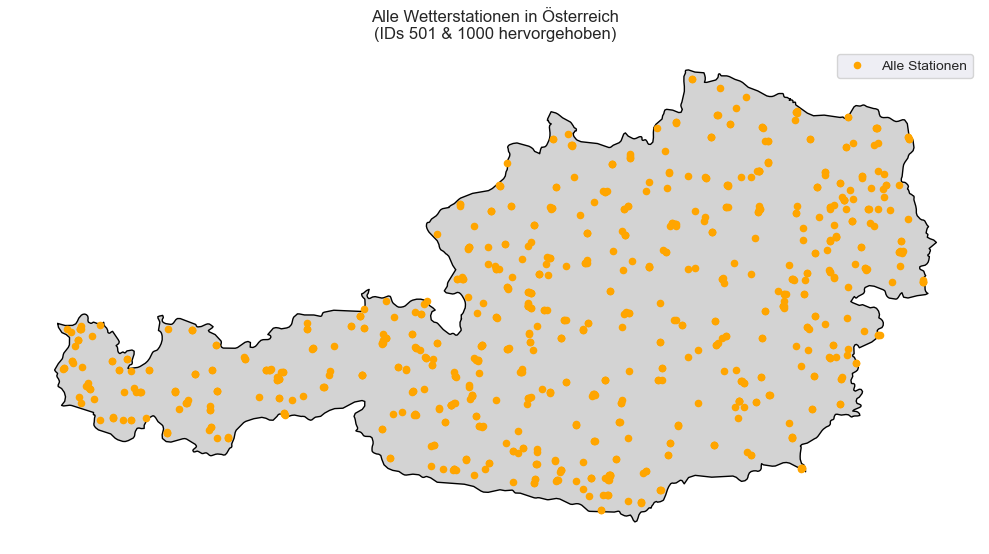

In [74]:
from shapely.geometry import shape, Point
# 1. Österreich-Grenze laden
countries_url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
countries_geojson = requests.get(countries_url).json()
aus_feat = next(
    f for f in countries_geojson['features']
    if f['properties'].get('ADMIN') == 'Austria' or f['properties'].get('name') == 'Austria'
)
aus_geom = shape(aus_feat['geometry'])
austria = gpd.GeoDataFrame(
    {'country': ['Austria']},
    geometry=[aus_geom],
    crs="EPSG:4326"
)

# 2. Stations-Metadaten abrufen
resource_id = 'klima-v2-1h'
stations_meta = requests.get(
    f"https://dataset.api.hub.geosphere.at/v1/station/historical/{resource_id}/metadata"
).json()['stations']

# 3. DataFrame & GeoDataFrame erstellen
stations_df = pd.DataFrame.from_records(stations_meta)[['id','lat','lon']].rename(columns={'id':'station_id'})
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=[Point(lon, lat) for lon, lat in zip(stations_df['lon'], stations_df['lat'])],
    crs="EPSG:4326"
)

# 4. Highlight-IDs definieren und splitten
highlight_ids = [501, 1000]
special = stations_gdf[stations_gdf['station_id'].isin(highlight_ids)]
others  = stations_gdf[~stations_gdf['station_id'].isin(highlight_ids)]

# 5. Plot
fig, ax = plt.subplots(figsize=(10, 10))
austria.plot(ax=ax, color='lightgray', edgecolor='black', zorder=0)
others.plot(ax=ax,   color='orange', markersize=20, label='Alle Stationen', zorder=1)
special.plot(ax=ax,  color='red',    markersize=60, label='IDs 501 & 1000', zorder=2)

ax.set_title("Alle Wetterstationen in Österreich\n(IDs 501 & 1000 hervorgehoben)")
ax.set_axis_off()
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [72]:
import math
# 1. Haversine-Funktion
def haversine(lat1, lon1, lat2, lon2):
    R = 6371e3  # Erdradius in Metern
    φ1, φ2 = math.radians(lat1), math.radians(lat2)
    Δφ = math.radians(lat2 - lat1)
    Δλ = math.radians(lon2 - lon1)
    a = math.sin(Δφ/2)**2 + math.cos(φ1)*math.cos(φ2)*math.sin(Δλ/2)**2
    return 2*R*math.asin(math.sqrt(a))

# 2. Ergebnis-Liste
results = []

# 3. Durch alle Centroid-Punkte iterieren
for idx, row in gdf_wgs[['nemesys_key','centroid']].iterrows():
    key = row['nemesys_key']
    lat0, lon0 = row['centroid'].y, row['centroid'].x

    # 4. Für jede Station Abstand berechnen
    stations_df['dist_m'] = stations_df.apply(
        lambda r: haversine(lat0, lon0, r['lat'], r['lon']),
        axis=1
    )

    # 5. Nächstgelegene Station auswählen
    nearest = stations_df.loc[stations_df['dist_m'].idxmin()]
    results.append({
        'nemesys_key': key,
        'station_id':  nearest['station_id'],
        'distance_m':  nearest['dist_m']
    })

# 6. In DataFrame packen und anzeigen
nearest_df = pd.DataFrame(results)


    nemesys_key  station_id    distance_m
0   FL_00025241       206.0  1.516823e+07
1   FL_00352191       501.0  5.555994e+06
2   FL_00020896     16920.0  1.755939e+07
3   FL_00024730     16920.0  1.874453e+07
4   FL_00024735       218.0  5.349234e+06
5   FL_00352244     11110.0  1.275275e+07
6   FL_00352430     16920.0  6.706220e+06
7   FL_00024731       158.0  1.148621e+07
8   FL_00352054       501.0  6.766333e+06
9   FL_00352189     11146.0  3.122900e+06
10  FL_00024616     11146.0  1.067479e+07
11  FL_00024667     16920.0  1.516965e+07
12  FL_00024360        11.0  1.437251e+07
13  FL_00352218       218.0  1.494747e+07
14  FL_00352208     11110.0  6.785815e+06
15  FL_00352243        11.0  4.949581e+06
16  FL_00025240       206.0  8.702078e+06
17  FL_00342704     20902.0  8.681056e+06
18  FL_00352254       206.0  1.183138e+07
19  FL_00025248       206.0  1.501396e+07
20  FL_00024702       501.0  1.461036e+07
21  KN_00001613       501.0  8.548996e+06
22  KN_00001886       206.0  1.491

In [73]:
nearest_df

,nemesys_key,station_id,distance_m
0,FL_00025241,206.0,1.516823e+07
1,FL_00352191,501.0,5.555994e+06
2,FL_00020896,16920.0,1.755939e+07
3,FL_00024730,16920.0,1.874453e+07
4,FL_00024735,218.0,5.349234e+06
5,FL_00352244,11110.0,1.275275e+07
6,FL_00352430,16920.0,6.706220e+06
7,FL_00024731,158.0,1.148621e+07
8,FL_00352054,501.0,6.766333e+06
9,FL_00352189,11146.0,3.122900e+06


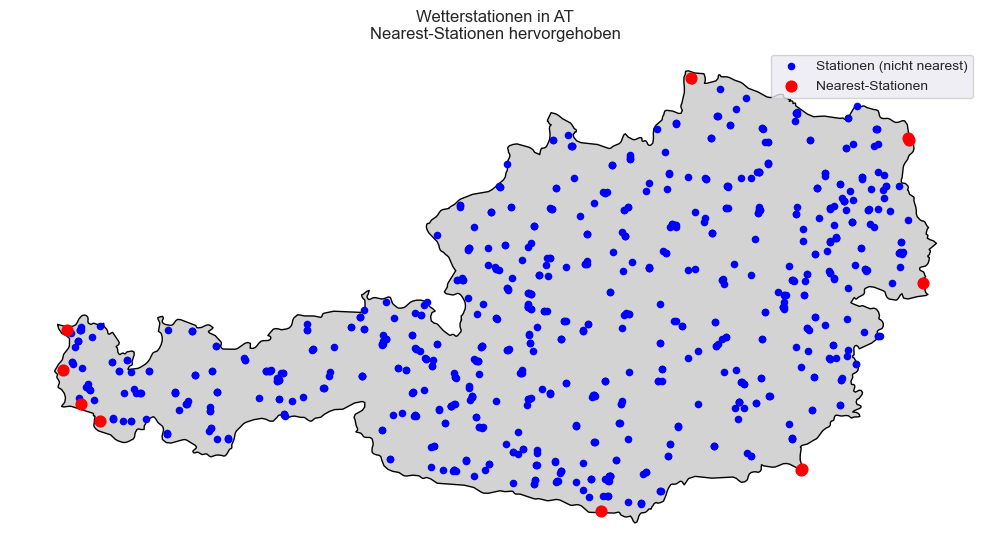

In [76]:
# 1. Lade Österreich-Grenze (EPSG:4326)
countries_url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world = gpd.read_file(countries_url)
austria = world[world['name']=='Austria'].to_crs("EPSG:4326")

# 2. Stations-Metadaten abrufen (falls stations_gdf noch nicht existiert)
resource_id   = 'klima-v2-1h'
stations_meta = requests.get(
    f"https://dataset.api.hub.geosphere.at/v1/station/historical/{resource_id}/metadata"
).json()['stations']
stations_df = pd.DataFrame.from_records(stations_meta)[['id','lat','lon']].rename(columns={'id':'station_id'})
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=[Point(lon, lat) for lon, lat in zip(stations_df['lon'], stations_df['lat'])],
    crs="EPSG:4326"
)

# 3. Liste der nächstgelegenen station_id aus nearest_df
#    (nearest_df muss bereits im Workspace vorhanden sein)
highlight_ids = nearest_df['station_id'].unique()

# 4. Aufteilen in hervorgehobene und alle anderen
highlight = stations_gdf[stations_gdf['station_id'].isin(highlight_ids)]
others    = stations_gdf[~stations_gdf['station_id'].isin(highlight_ids)]

# 5. Plot
fig, ax = plt.subplots(figsize=(10,10))
austria.plot(ax=ax, color='lightgray', edgecolor='black', zorder=0)

# alle Stationen in Blau
others.plot(
    ax=ax,
    color='blue',
    markersize=20,
    label='Stationen (nicht nearest)',
    zorder=1
)

# nearest-Stationen in Rot
highlight.plot(
    ax=ax,
    color='red',
    markersize=60,
    label='Nearest-Stationen',
    zorder=2
)

ax.set_title("Wetterstationen in AT\nNearest-Stationen hervorgehoben")
ax.axis('off')
ax.legend(loc='upper right')
plt.tight_layout()

In [77]:
nearest_df['station_id'].unique()

array([2.0600e+02, 5.0100e+02, 1.6920e+04, 2.1800e+02, 1.1110e+04,
       1.5800e+02, 1.1146e+04, 1.1000e+01, 2.0902e+04, 2.6000e+03,
       1.4120e+04])

In [78]:
nearest_df['station_id']

0       206.0
1       501.0
2     16920.0
3     16920.0
4       218.0
5     11110.0
6     16920.0
7       158.0
8       501.0
9     11146.0
10    11146.0
11    16920.0
12       11.0
13      218.0
14    11110.0
15       11.0
16      206.0
17    20902.0
18      206.0
19      206.0
20      501.0
21      501.0
22      206.0
23      501.0
24     2600.0
25      158.0
26      501.0
27      158.0
28      501.0
29     2600.0
30    11110.0
31      158.0
32    11110.0
33      501.0
34    16920.0
35    11146.0
36      501.0
37    11146.0
38    16920.0
39      206.0
40     2600.0
41     2600.0
42    14120.0
Name: station_id, dtype: float64